<a href="https://colab.research.google.com/github/MahmoudAlsayes/pythonProject/blob/master/02_neural_network_classification__with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# there is 3 types of classification problems

#1. Binary classification
#2. Multiclass classification
#3. Multilabel classification


 # Create data to view and fit
  

In [3]:
from sklearn.datasets import make_circles

#Make 1000 examples
n_samples=1000
# Create circles
X,y=make_circles(n_samples,noise=0.03,
                 random_state=42)


In [4]:
# check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
# check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [6]:
import pandas as pd
circles=pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


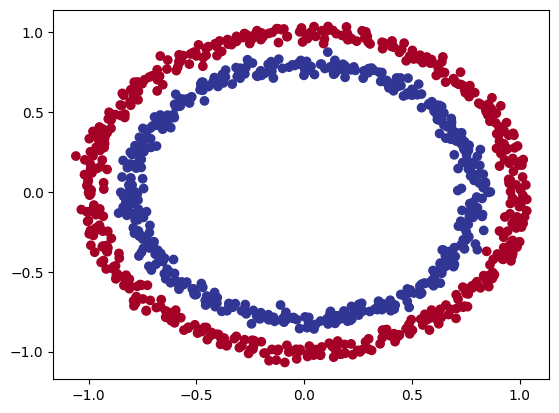

In [7]:
# Visualized with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

## Import and output shapes


In [8]:
# Check the shapes of our features and labels
X.shape , y.shape

((1000, 2), (1000,))

In [9]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [10]:
# How many sample we're working
len(X),len(y)

(1000, 1000)

In [11]:
# View the first example of features and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

In [12]:
import tensorflow as tf
tf.random.set_seed(42)
# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. Complie the model
model_1.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"]
                )
# 3. Fit
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5126 - loss: 7.7212    
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5287 - loss: 0.2120 
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5237 - loss: 0.1777 
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5143 - loss: 0.1734  
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5152 - loss: 0.1733 


In [13]:
# let's try and improve
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4856 - loss: 0.1732  


[0.17335325479507446, 0.47200000286102295]

In [14]:
tf.random.set_seed(42)
# 1. create a model with 2 layer
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
# 2. compile
model_2.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
#3.fit
model_2.fit(X,y,epochs=100,verbose=0)

In [15]:
#4. evaluate
model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4955 - loss: 0.1732  


[0.17332546412944794, 0.5]

In [16]:
circles["label"].value_counts()

,count
label,
1,500
0,500


# Improve our model
1. Create a model - add more layres or increase the numbers of hidden units
2. compile a model - choose different optmizers
3. fit a model


In [17]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7 (32.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [18]:
# set the random seed
tf.random.set_seed(42)

#1. Create the model 3 layers
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#2. compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#3. fit the model
model_3.fit(X,y,epochs=100,verbose=0)

In [19]:
# 4. evaluate
model_3.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5069 - loss: 0.6915  


[0.6944308876991272, 0.4860000014305115]

In [20]:
model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4955 - loss: 0.1732 


[0.17332546412944794, 0.5]

In [21]:
model_3.predict(X)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.51770586],
       [0.46873492],
       [0.46721452],
       [0.4895103 ],
       [0.4883209 ],
       [0.4865169 ],
       [0.50340647],
       [0.5167996 ],
       [0.4708318 ],
       [0.5037868 ],
       [0.46023554],
       [0.5225069 ],
       [0.5006112 ],
       [0.5072873 ],
       [0.49867886],
       [0.48268706],
       [0.45442945],
       [0.47955096],
       [0.4623403 ],
       [0.45676047],
       [0.51747596],
       [0.4869839 ],
       [0.47198504],
       [0.51806194],
       [0.46918207],
       [0.4638343 ],
       [0.5159286 ],
       [0.51330817],
       [0.48454863],
       [0.502601  ],
       [0.46432787],
       [0.50006133],
       [0.5037608 ],
       [0.5218179 ],
       [0.46859473],
       [0.47696513],
       [0.4818918 ],
       [0.5163982 ],
       [0.4853186 ],
       [0.52451307],
       [0.4576826 ],
       [0.517568  ],
       [0.4556324 ],
       [0.512028  ],
       [0.45354944],
       [0.45513296],
       [0.49276805],
       [0.510

# visualization
* feature X , label y
* create a meshgrid of the different X values

In [22]:
import numpy as np
def plot_decision_boundary (model,X,y):
  # Define the axis boundaries of the plot
  x_min,x_max=X[:,0].min()-0.1,X[:,0].max()+0.1
  y_min,y_max=X[:,1].min()-0.1,X[:,1].max()+0.1
  xx,yy=np.meshgrid(np.linspace(x_min,x_max),
                    np.linspace(y_min,y_max))
  # create X value
  x_in=np.c_[xx.ravel(),yy.ravel()]

  # make prediction
  y_pred = model.predict(x_in)
  # check for multi-class
  if len(y_pred[0])>1:
    print("doing multiclass classification")
    # we have a reshape
    y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred=np.round(y_pred).reshape(xx.shape)

  #plot
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alfa=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


<ipython-input-22-63b16a416832>:23: UserWarning: The following kwargs were not used by contour: 'alfa'
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alfa=0.7)


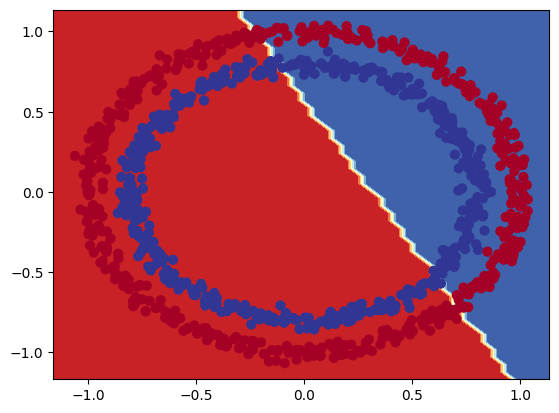

In [23]:
# Check out the prediction
plot_decision_boundary(model=model_3,X=X,y=y)

In [24]:
# # Let's see if our model can be used for a regression problem
tf.random.set_seed(42)

# create some regression data
X_regression=tf.range(0,1000,5)
y_regression=tf.range(100,1100,5) # y=x+100
# split
X_reg_train=X_regression[:150]
X_reg_test=X_regression[150:]
y_reg_train=y_regression[:150]
y_reg_test=y_regression[150:]


In [25]:

# # fit
# model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
#             y_reg_train,
#             epochs=100)

In [26]:
# Setup random seed
tf.random.set_seed(42)

# 1. Crate the model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
# 3.fit
model_3.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 395.0084 - mae: 395.0084
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 307.0620 - mae: 307.0620 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 216.6923 - mae: 216.6923 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 123.0065 - mae: 123.0065 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44.6763 - mae: 44.6763 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 72.0254 - mae: 72.0254 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 72.7498 - mae: 72.7498 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 50.1542 - mae: 50.1542 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 43.7796 - mae: 43.7796 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 44.5108 - mae: 44.5108 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 41.0911 - mae: 41.0911 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42.6951 - mae: 42.6951 
Epoch 13/100
5/5 ━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


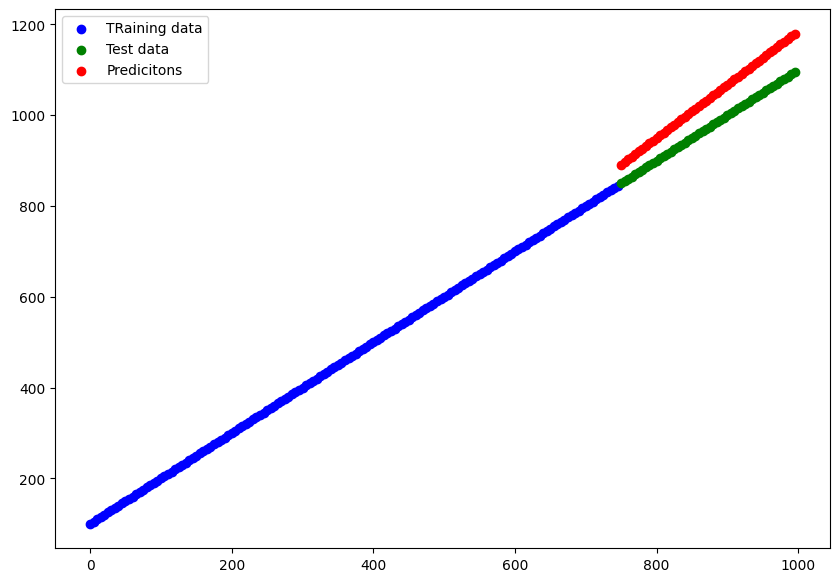

In [27]:
y_reg_pred=model_3.predict(X_reg_test)
# plot the model prediction
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c="b", label="TRaining data")
plt.scatter(X_reg_test,y_reg_test,c="g",label="Test data")
plt.scatter(X_reg_test,y_reg_pred,c="r",label="Predicitons")
plt.legend()

# Non-linerarity

In [28]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
#3.fit
history=model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4419 - loss: 4.9491
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4419 - loss: 4.9317
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4403 - loss: 4.9208
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4377 - loss: 4.8924
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4390 - loss: 4.8786
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4387 - loss: 4.8749
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4387 - loss: 4.8712
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4385 - loss: 4.8676
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4363 - loss: 4.8621
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4363 - loss: 4.8581
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4363 - loss: 4.8554
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

<ipython-input-29-835e5ad0f53e>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:,0],X[:,1],c="y",cmap=plt.cm.RdYlBu);


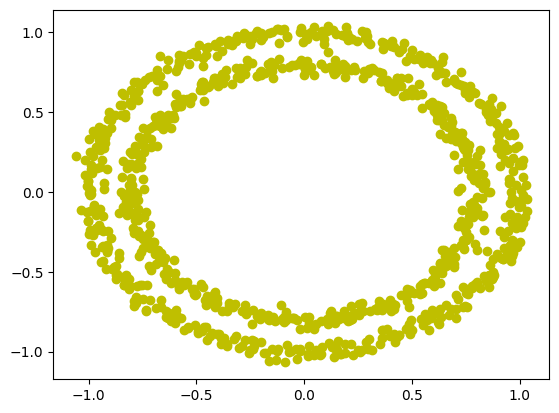

In [29]:
plt.scatter(X[:,0],X[:,1],c="y",cmap=plt.cm.RdYlBu);

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
doing binary classification


<ipython-input-22-63b16a416832>:23: UserWarning: The following kwargs were not used by contour: 'alfa'
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alfa=0.7)


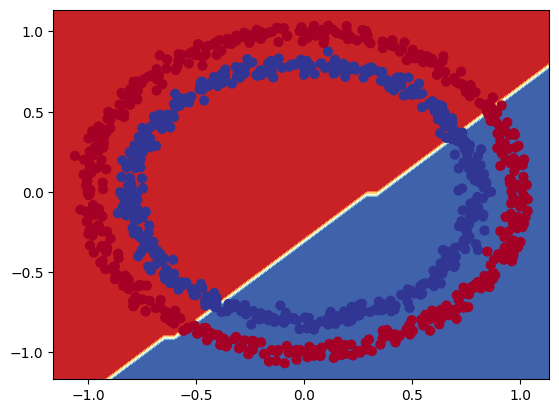

In [30]:
plot_decision_boundary(model=model_4,
                       X=X,y=y)

# Build nural network with non-linear

In [31]:
# Set random seed
tf.random.set_seed(42)
#create a model
model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation="relu")

])

# compile
model_5.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
#fit
history=model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4703 - loss: 8.6437   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4733 - loss: 8.2117 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4670 - loss: 7.7201 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4658 - loss: 7.4007 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4588 - loss: 7.2018 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4563 - loss: 6.9519 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4587 - loss: 6.7702 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4573 - loss: 6.6232 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4652 - loss: 6.5311 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4603 - loss: 6.4695 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4640 - loss: 6.3450 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [32]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4830 - loss: 4.4715
Epoch 2/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4827 - loss: 4.2195 
Epoch 3/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4592 - loss: 3.9027 
Epoch 4/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4110 - loss: 3.6127 
Epoch 5/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4292 - loss: 3.4086 
Epoch 6/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4342 - loss: 3.0182 
Epoch 7/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4449 - loss: 2.3366 
Epoch 8/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4074 - loss: 0.8363
Epoch 9/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3930 - loss: 0.7904
Epoch 10/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3977 - loss: 0.7736 
Epoch 11/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3946 - loss: 0.7626 
Epoch 12/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a

In [34]:
model_6.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9945 - loss: 0.0371


[0.03409155458211899, 0.9929999709129333]

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
doing binary classification


<ipython-input-22-63b16a416832>:23: UserWarning: The following kwargs were not used by contour: 'alfa'
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alfa=0.7)


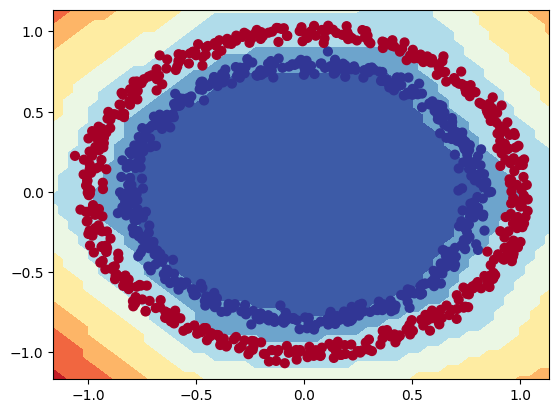

In [35]:
plot_decision_boundary(model_6,X,y)

In [36]:
tf.random.set_seed(42)

# 1. create a model
model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
#2. compile
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
#3.fit
model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5038 - loss: 0.6972 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5234 - loss: 0.6948 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5122 - loss: 0.6943 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4833 - loss: 0.6944 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 0.6946 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 0.6947 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 0.6947
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4832 - loss: 0.6946 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4792 - loss: 0.6945
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4820 - loss: 0.6943
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4753 - loss: 0.6940 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - a

In [37]:
# evaluate
model_7.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6556 - loss: 0.6158  


[0.620808482170105, 0.6449999809265137]

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
doing binary classification


<ipython-input-22-63b16a416832>:23: UserWarning: The following kwargs were not used by contour: 'alfa'
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alfa=0.7)


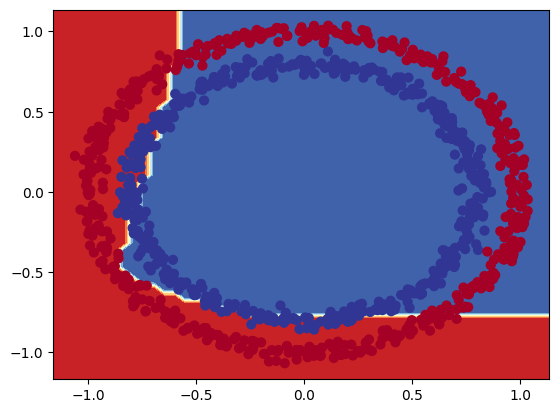

In [38]:
# Visualize
plot_decision_boundary(model_7,X,y)

In [39]:
# Create a toy tensor (similar to the data we pass into our models)
A=tf.cast(tf.range(-10,10),tf.float32)
A


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

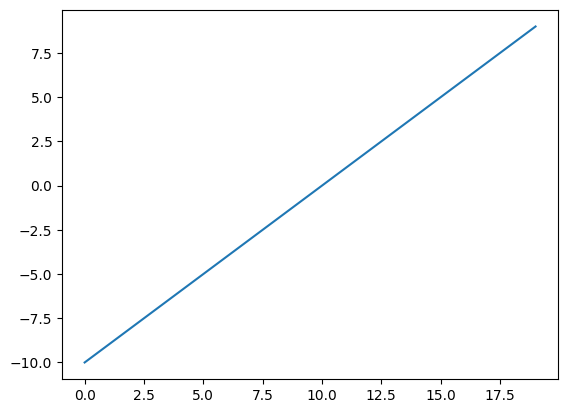

In [40]:
# Visualize toy
plt.plot(A)

In [41]:
# replicate sigmoid
def sigmoid(x):
  return 1/(1+tf.exp(-x))


# use sigmoid
sigmoid(A)


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

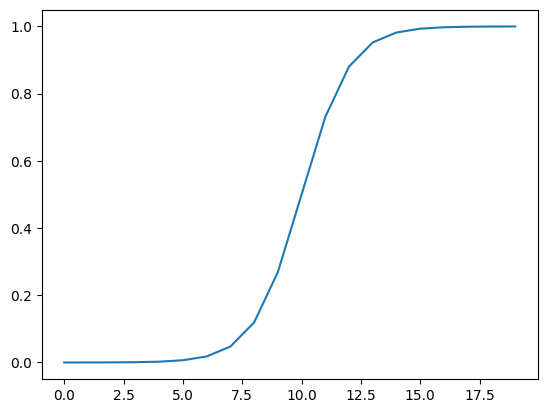

In [42]:
plt.plot(sigmoid(A))

# relu

In [43]:
def relu(x):
  return tf.maximum(0,x)


relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

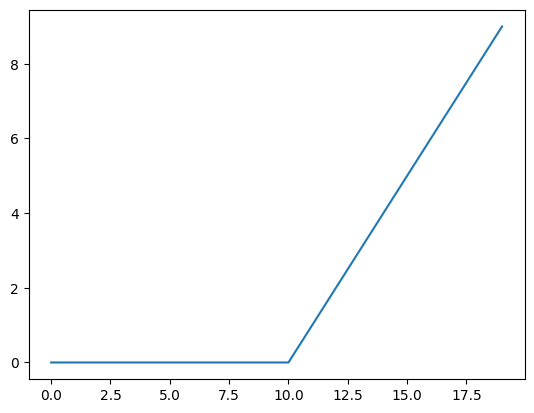

In [44]:
plt.plot(relu(A))

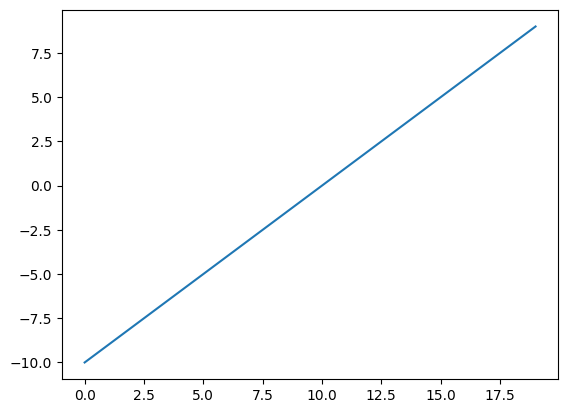

In [45]:
plt.plot(A)

In [46]:
#Let's try liner activiation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

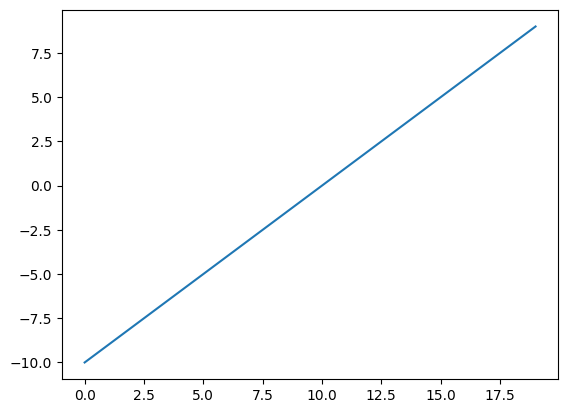

In [49]:
# Dose liner activiation change anything?
plt.plot(tf.keras.activations.linear(A))

In [50]:
A==tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>